<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Unsupervised Learning: K-Means Clustering, Hierarchical Clustering & PCA</center></font></h1>
<h1><center>AllLife Bank Customer Segmentation</center></h1>
<h3><center>Charlcye Mitchell, February 2023</center></h3>

#Problem Definition

##Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to **run personalized campaigns to target new customers as well as upsell to existing customers.** 

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the Operations team wants to **upgrade the service delivery model, to ensure that customer queries are resolved faster.** 

Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


##Objective
*   Utilize clustering algorithms to identify different segments in the existing customer base based on their spending patterns & past interaction with the bank
*   Provide recommendations to the bank on how to better market to and service these customers.


###Data Dictionary

*   **Sl_No:** Primary key of the records
*   **Customer Key:** Customer identification number
*   **Average Credit Limit:** Average credit limit of each customer for all credit cards
*   **Total credit cards:** Total number of credit cards possessed by the customer
*   **Total visits bank:** Total number of visits that customer made (yearly) personally to the bank
*   **Total visits online:** Total number of visits or online logins made by the customer (yearly)
*   **Total calls made:** Total number of calls made by the customer to the bank or its customer service department (yearly)



#Exploratory Data Analysis

###Importing the necessary packages

In [3]:
# Basic libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data scaling with z-score
from sklearn.preprocessing import StandardScaler

# Distance computation
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# K-means clustering and silhouette scoring
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow curve and silhouette scoring
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Hierarchical clustering, cophenetic correlation, and dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# PCA
from sklearn.decomposition import PCA

###Reading the Datasets

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read in the dataset
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/new_preprocessed_data.csv')

In [5]:
# looking at head (5 observations) 
df.head()

,loan_status,Principal,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,terms_7,terms_15,terms_30
0,0,1000,45,0,1,0,0,0,1,0,0,1
1,0,1000,50,1,0,0,0,1,0,0,0,1
2,0,1000,33,1,0,0,0,1,0,0,0,1
3,0,1000,27,0,0,0,1,0,1,0,1,0
4,0,1000,28,0,0,0,1,1,0,0,0,1


In [6]:
# count the rows and columns
df.shape

(500, 12)

In [7]:
# check the null counts and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   loan_status                     500 non-null    int64
 1   Principal                       500 non-null    int64
 2   age                             500 non-null    int64
 3   education_Bechalor              500 non-null    int64
 4   education_High School or Below  500 non-null    int64
 5   education_Master or Above       500 non-null    int64
 6   education_college               500 non-null    int64
 7   Gender_female                   500 non-null    int64
 8   Gender_male                     500 non-null    int64
 9   terms_7                         500 non-null    int64
 10  terms_15                        500 non-null    int64
 11  terms_30                        500 non-null    int64
dtypes: int64(12)
memory usage: 47.0 KB


In [8]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

loan_status                       0
Principal                         0
age                               0
education_Bechalor                0
education_High School or Below    0
education_Master or Above         0
education_college                 0
Gender_female                     0
Gender_male                       0
terms_7                           0
terms_15                          0
terms_30                          0
dtype: int64

In [9]:
df.isnull().values.any() # If there are any null values in data set

False

In [10]:
# pd.set_option('display.max_rows', None) - will show all rows if you want to see them
df['Total_visits_online'].value_counts()

KeyError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


##Observations

*   There are 660 rows, all numerical in nature.
*   The numerical variables have different ranges and have to be scaled before clustering.
*   There are no missing values in the data.

##Univariate Analysis

In [ ]:
df = df.drop('Sl_No', axis=1)

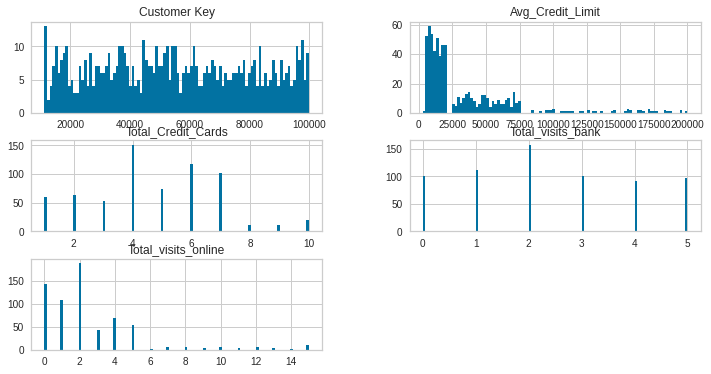

In [ ]:
columns = list(df)[0:-1] 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

In [ ]:
# Create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

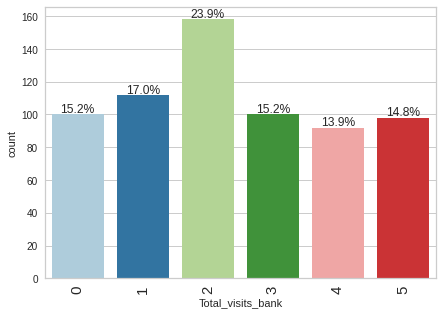

In [ ]:
labeled_barplot(df, "Total_visits_bank", perc=True)

In [ ]:
# Plot a boxplot and histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

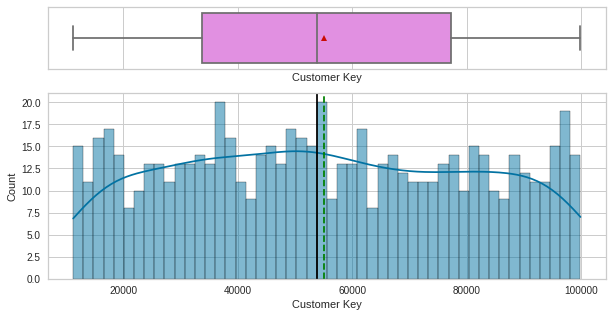

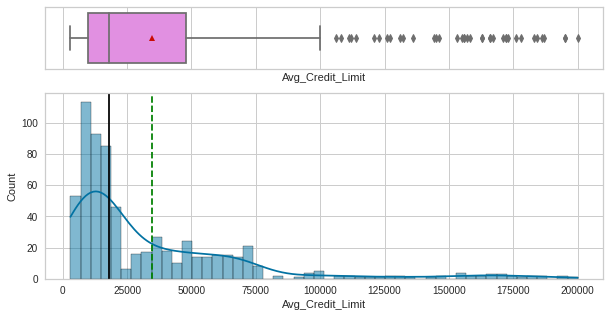

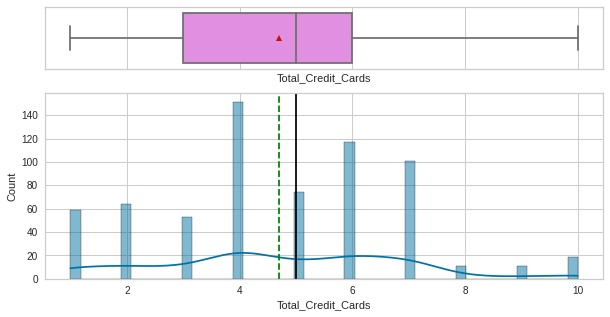

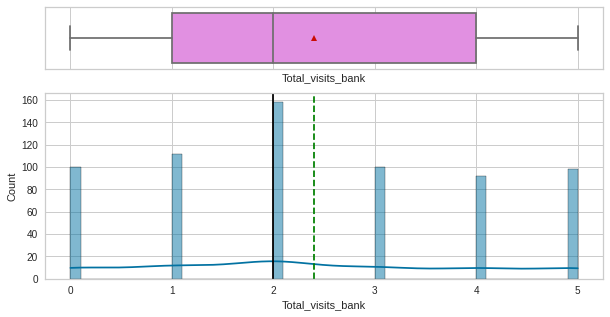

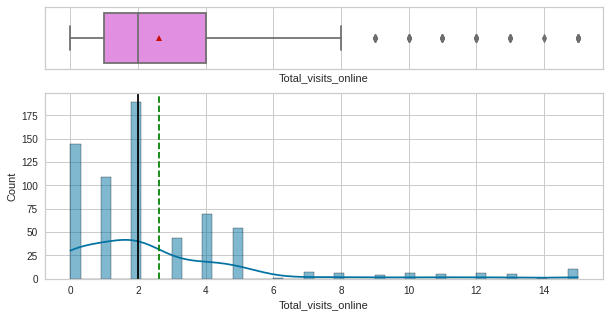

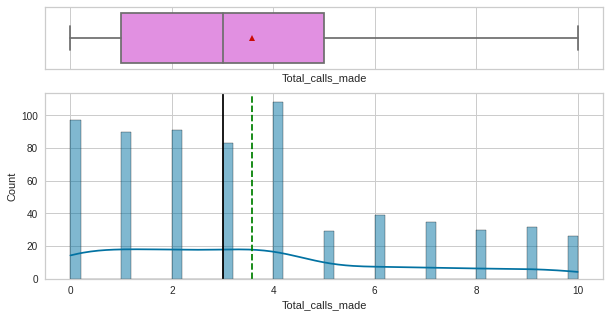

In [ ]:
# Select numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

##Bivariate Analysis

Bi means two and variate means variable, so here there are two variables. The analysis is related to the relationship between the two variables.

Different types of Bivariate Analysis that can be done:
- Bivariate Analysis of two Numerical Variables
- Bivariate Analysis of two Categorical Variables
- Bivariate Analysis of one Numerical Variables and one Categorical Variable

In [ ]:
df.corr() 

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


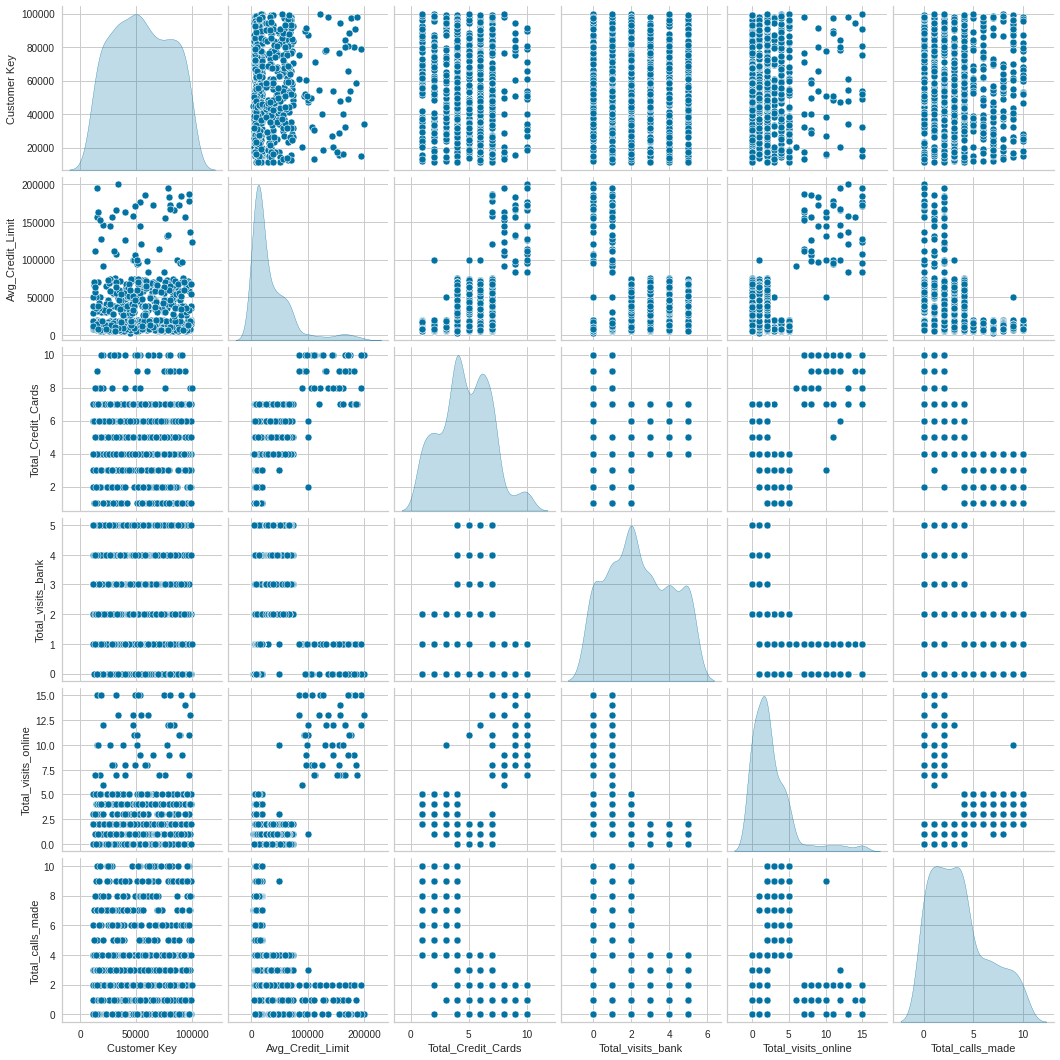

In [ ]:
sns.pairplot(df, diag_kind="kde")
plt.show()

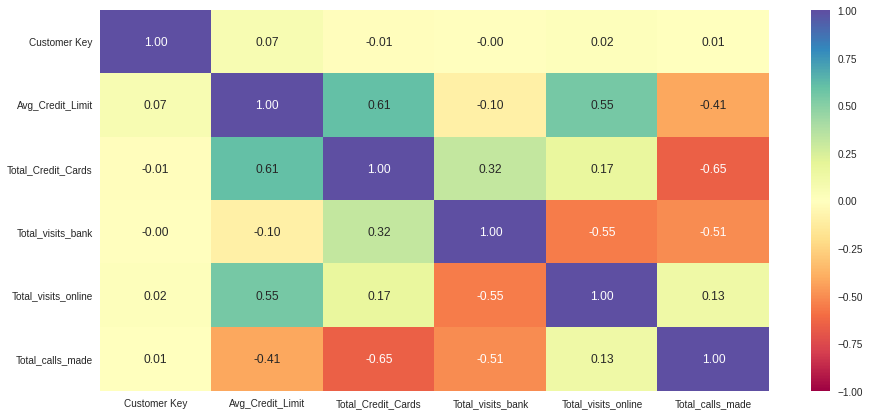

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Insights based on EDA

*  73% of the customers have 4+ credit cards
* 15% 0 bank visits; 17% 1 visit; 24% 2 visits; 14%-15% 3,4,5 visits
* 22% of customers never visit online; 70% 1-5 times; 8% 6+ times
* Customers who have 4 to 7 credit cards visit banks most frequently - up to 5 times
* 15% call the bank 0 times; 56% 1-4 times; 29% 5+ times




#Data preprocessing
Prepare the data for analysis

##Outlier treatment

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

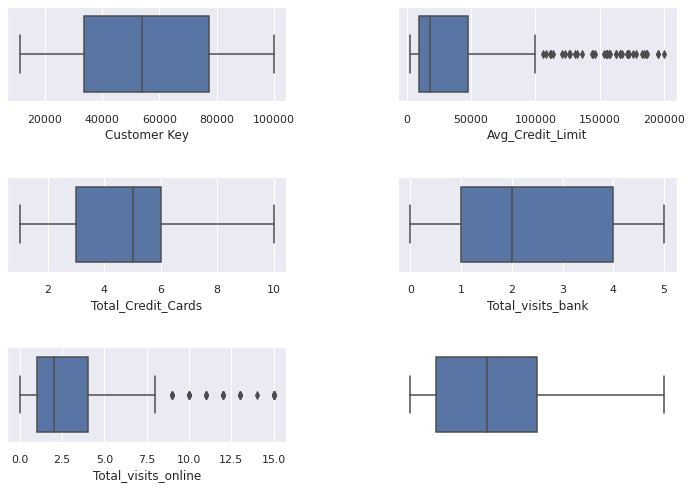

In [ ]:
# Visually checking distributions
sns.set(font_scale=1)
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
fig, axes = plt.subplots(3,2, figsize=(12,8))
fig.subplots_adjust(hspace=0.8, wspace=0.4)
for axis, element in zip(axes.flat, numerical_col):
    sns.boxplot(df[element], ax=axis)
axes[2,1].set_axis_off();

In [ ]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a variable
    df: data frame
    col: name of the feature
    '''
    
    # Defining quantiles:
    # 25th quantile
    Q1=df[col].quantile(0.25)
    
    # 75th quantile
    Q3=df[col].quantile(0.75)
    
    # Inter quantile Q3 - Q1;
    IQR=Q3-Q1
    
    # Base quantile less 1.5*IQR
    Lower_Whisker = Q1 - 1.5*IQR
    if Lower_Whisker < 0:
        Lower_Whisker = 0
    
    
    # Top quantile plus 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    
 
    # assigning max and min value to the array, meaning that outliers will be subscribed by:
    # min (Lower_Whisker) 
    # max (Upper_Whisker)
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) 
    
    # returning clipped data
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    '''
    # Looping through the data and applying the function "treat_outliers"
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [ ]:
# Applying the outliers treatment
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
numerical_col

['Customer Key',
 'Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [ ]:
# passing the columns and the dataframe in order to remove outliers
df_outliers_treated = treat_outliers_all(df,numerical_col)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

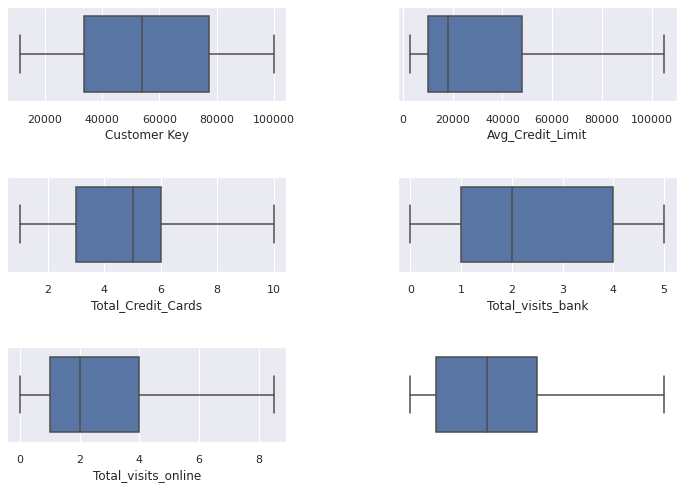

In [ ]:
# Visually checking distributions
sns.set(font_scale=1)
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
fig, axes = plt.subplots(3,2, figsize=(12,8))
fig.subplots_adjust(hspace=0.8, wspace=0.4)
for axis, element in zip(axes.flat, numerical_col):
    sns.boxplot(df[element], ax=axis)
axes[2,1].set_axis_off();

In [ ]:
# Saving new dataframe
df_outliers = df_outliers_treated.copy()

##Scale the data

In [ ]:
# Scaling the dataset before clustering
scaler=StandardScaler()
subset=df_outliers.copy()
subset_scaled=scaler.fit_transform(subset)   

In [ ]:
# Creating a dataframe of the above results
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

#Applying K-means Clustering

##Plot the Elbow curve

Number of Clusters: 1 	Average Distortion: 2.311738174058943
Number of Clusters: 2 	Average Distortion: 1.814381952973524
Number of Clusters: 3 	Average Distortion: 1.535621724557708
Number of Clusters: 4 	Average Distortion: 1.3999257208457676
Number of Clusters: 5 	Average Distortion: 1.3117448975172892
Number of Clusters: 6 	Average Distortion: 1.2539085518155357
Number of Clusters: 7 	Average Distortion: 1.2093961152590138
Number of Clusters: 8 	Average Distortion: 1.1722135792145598


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

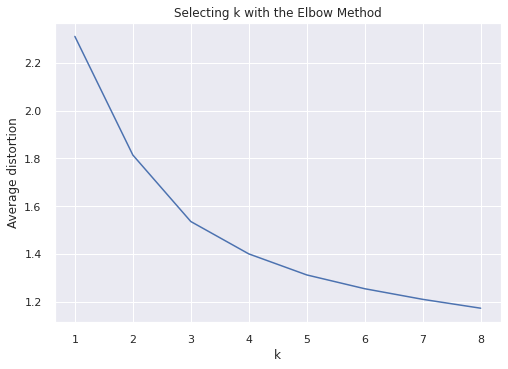

In [ ]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Appropriate k seems to be a 2 or 3.

##Check Silhouette Scores

For n_clusters = 2, silhouette score is 0.3454829798589436)
For n_clusters = 3, silhouette score is 0.42412535943374324)
For n_clusters = 4, silhouette score is 0.32354597199655155)
For n_clusters = 5, silhouette score is 0.27816234329936174)
For n_clusters = 6, silhouette score is 0.25729119070880646)
For n_clusters = 7, silhouette score is 0.24581674563181485)
For n_clusters = 8, silhouette score is 0.24537603875950634)
For n_clusters = 9, silhouette score is 0.2346129593060118)


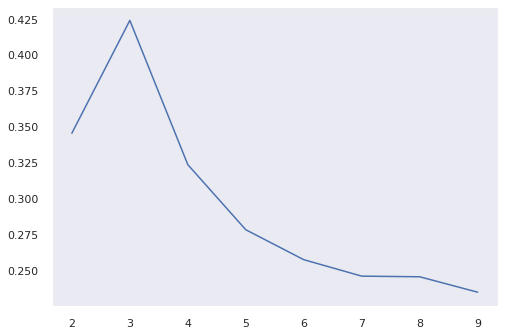

In [ ]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list,sil_score)
plt.grid()

3 has the highest score.

##Figure out appropriate number of clusters

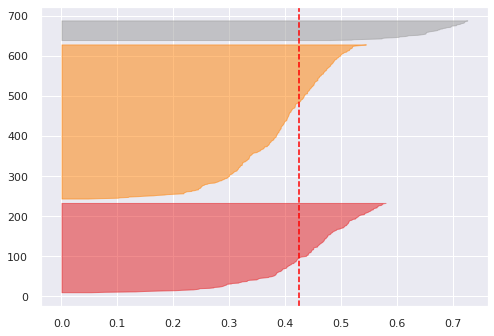

In [ ]:
# Find the optimal number of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df);    
# visualizer.show();

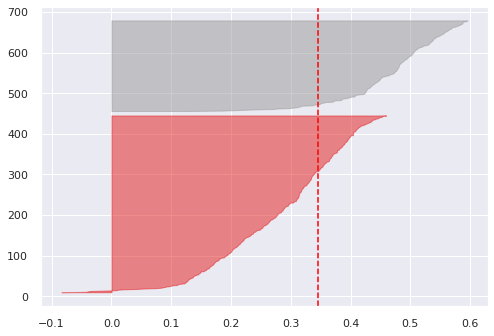

In [ ]:
# Find the optimal number of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state = 1))
visualizer.fit(subset_scaled_df);
# visualizer.show();

Using 3 clusters based on the elbow curve and high silhoutte score

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [ ]:
df_outliers['K_means_segments'] = kmeans.labels_

##Cluster Profiling

In [ ]:
cluster_profile = df_outliers.groupby('K_means_segments').mean()

In [ ]:
cluster_profile

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_segments,,,,,,
0,56708.760000,102660.000000,8.740000,0.600000,8.180000,1.080000
1,55239.830357,12174.107143,2.410714,0.933036,3.546875,6.870536
2,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000


In [ ]:
cluster_profile['Freq'] = df_outliers.groupby('K_means_segments')['Avg_Credit_Limit'].count().values

In [ ]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'yellow', axis = 0)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Freq
K_means_segments,,,,,,,
0,56708.760000,102660.000000,8.740000,0.600000,8.180000,1.080000,50
1,55239.830357,12174.107143,2.410714,0.933036,3.546875,6.870536,224
2,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,386


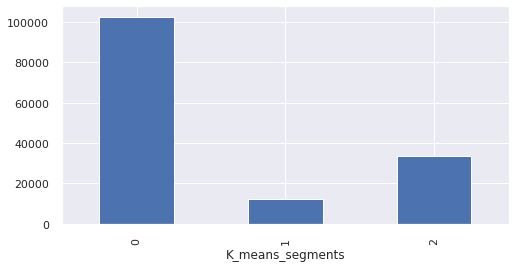

In [ ]:
# Checking the groups for Avg_Credit_Limit
cluster_profile['Avg_Credit_Limit'].groupby('K_means_segments').mean().plot.bar(figsize=(8,4));

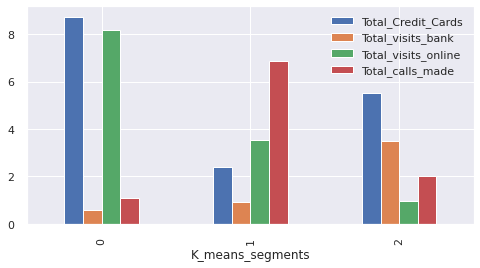

In [ ]:
# Checking the groups for the remainder features
cluster_profile[['Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']].groupby('K_means_segments').mean().plot.bar(figsize=(8,4));

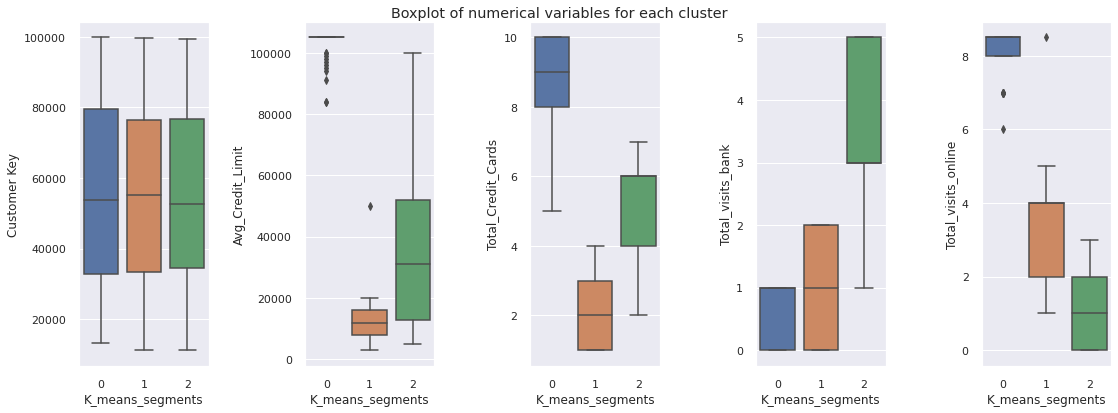

In [ ]:
list_columns =  cluster_profile.columns
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df_outliers[list_columns[counter]],x=df_outliers['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

#### **Insights from K-means clustering**
- Cluster 0 :
    - `Avg_Credit_Limit:` Midrange
    - `Total_Credit_Cards:` Midrange
    - `Total_visits_bank:` Frequent
    - `Total_visits_online:` Infrequent
    - `Total_calls_made:` Infrequent
- Cluster 1 :
    - `Avg_Credit_Limit:` Low
    - `Total_Credit_Cards:` Low
    - `Total_visits_bank:` Infrequent
    - `Total_visits_online:` Moderate
    - `Total_calls_made:` Frequent
- Cluster 2 :
    - `Avg_Credit_Limit:` High
    - `Total_Credit_Cards:` High
    - `Total_visits_bank:` Infrequent
    - `Total_visits_online:` Frequent
    - `Total_calls_made:` Infrequent





#Applying Hierarchical Clustering
Apply Hierarchical clustering with different linkage methods

In [ ]:
subset_scaled_df.sample(3)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
16,0.291919,-0.585108,-1.249225,-0.860451,-0.176357,0.145528
168,-0.709278,-0.795747,-1.710864,-0.860451,0.710465,1.891859
558,1.106067,0.292554,0.597334,1.592670,-0.619767,-0.553005


In [ ]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
compare = []

##Plot dendrograms for each linkage method

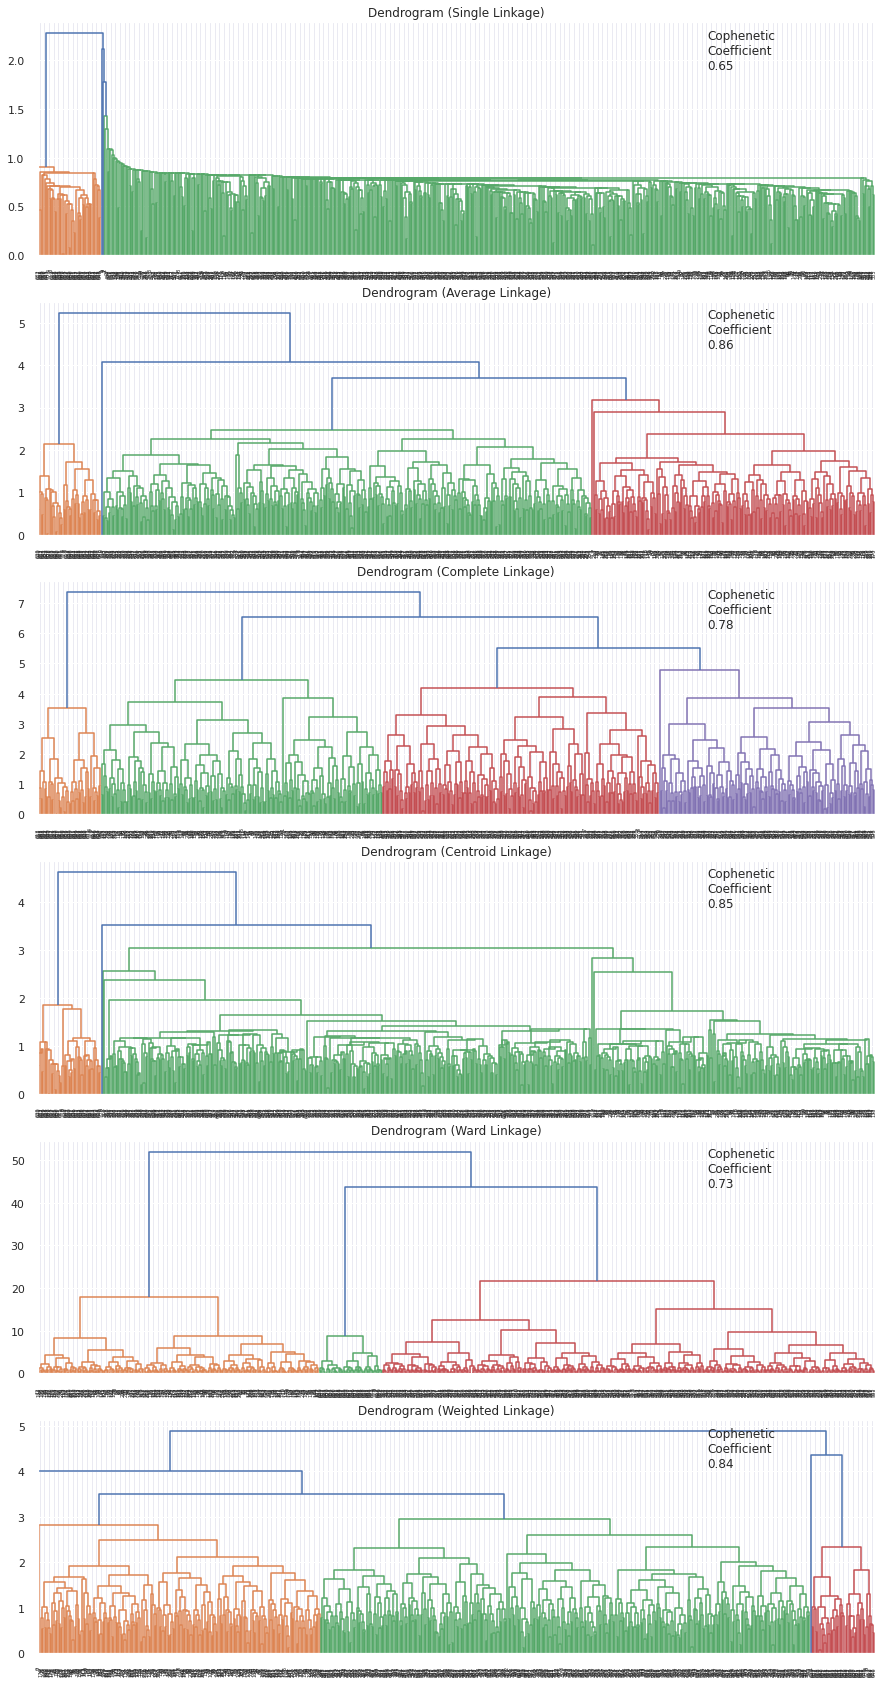

In [ ]:
# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
    compare.append([method, coph_corr])

`Weighted, centroid and average linkage` have distinct clusters with the highest correlation score.

##Check cophenetic correlation for each linkage method


In [ ]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
distance_metrics = [ 'euclidean','chebyshev','mahalanobis','cityblock']
linkage_methods = ['single', 'complete', 'average', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
        print('Cophent correlation for distance metrics {} and linkage method {} is {}'.format(dm,lm,c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophent correlation for distance metrics euclidean and linkage method single is 0.650273520894075
Cophent correlation for distance metrics euclidean and linkage method complete is 0.7797230213404011
Cophent correlation for distance metrics euclidean and linkage method average is 0.8569992252122519
Cophent correlation for distance metrics euclidean and linkage method weighted is 0.8386640929069928
Cophent correlation for distance metrics chebyshev and linkage method single is 0.6537376626994164
Cophent correlation for distance metrics chebyshev and linkage method complete is 0.7040451587966806
Cophent correlation for distance metrics chebyshev and linkage method average is 0.8512133151267873
Cophent correlation for distance metrics chebyshev and linkage method weighted is 0.7685566996016424
Cophent correlation for distance metrics mahalanobis and linkage method single is 0.6384436796967112
Cophent correlation for distance metrics mahalanobis and linkage method complete is 0.350066787083

In [ ]:
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Highest cophenet correlation is 0.8569992252122519, which is obtinaed with euclidean distance metric and average linkage method


In [ ]:
# Create and print dataframe to compare Cophenetic Coefficient for each linkage
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.650274
1,average,0.856999
2,complete,0.779723
3,centroid,0.854201
4,ward,0.728933
5,weighted,0.838664


##Figure out appropriate number of clusters

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
#Trying with K value as 3
HCmodel = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='average')
HCmodel.fit(subset_scaled_df)
subset_scaled_df['HC_Clusters'] = HCmodel.labels_

In [ ]:
df_outliers['HC_Clusters'] = HCmodel.labels_

##Cluster Profiling

In [ ]:
cluster_profile_HC = df_outliers.groupby('HC_Clusters').mean()

In [ ]:
cluster_profile_HC

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
HC_Clusters,,,,,,,
0,54960.331691,25725.779967,4.37931,2.553366,1.925287,3.794745,1.632184
1,56708.760000,102660.000000,8.74000,0.600000,8.180000,1.080000,0.000000
2,87073.000000,100000.000000,2.00000,1.000000,1.000000,0.000000,2.000000


In [ ]:
cluster_profile_HC['Freq'] = df_outliers.groupby('HC_Clusters')['Avg_Credit_Limit'].count().values

In [ ]:
# lets display cluster profile
cluster_profile_HC.style.highlight_max(color = 'lightgreen', axis = 0)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,Freq
HC_Clusters,,,,,,,,
0,54960.331691,25725.779967,4.379310,2.553366,1.925287,3.794745,1.632184,609
1,56708.760000,102660.000000,8.740000,0.600000,8.180000,1.080000,0.000000,50
2,87073.000000,100000.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1


####Insights from Hierarchical Clustering

**Cluster 0:**

* Avg_Credit_Limit: Low
* Total_Credit_Cards: Low
* Total_visits_bank: Infrequent
* Total_visits_online: Midrange
* Total_calls_made: Midrange

**Cluster 1:**

* Avg_Credit_Limit: High
* Total_Credit_Cards: Midrange
* Total_visits_bank: Low
* Total_visits_online: High
* Total_calls_made: High

**Cluster 2:**

* Avg_Credit_Limit: Midrange
* Total_Credit_Cards: High
* Total_visits_bank: Midrange
* Total_visits_online: Low
* Total_calls_made: Low

#Actionable Insights & Recommendations

There are 3 distinct customer segements in the AllLife Bank credit card customer base:

**Customer Segment 1 (58.4% of customers)**

 * Average credit limit between 25k and 75k
 * Own 4-7 credit cards
 * Visit the bank in person 2-5 times
 * Utilize online banking 0-2 times
 * Utilize phone banking 0-4 times

**Customer Segment 2 (34% of customers)**

 * Average credit limit below 25k
 * Own 1-4 credit cards
 * Visit the bank in person 0-2 times
 * Utilize online banking 1-5 times
 * Utilize phone banking 4-10 times

**Customer Segment 3 (7.3% of customers)**

 * Average credit limit above 75k
 * Own 7-10 credit cards
 * Visit the bank in person 0-1 times
 * Utilize online banking 7-15 times
 * Utilize phone banking 0-2 times

**What are your recommendations to the bank on how to target new customers, upsell existing customers, and improve the service delivery model?**

* Target new high credit limit customers via online campaigns, as they do little business in person or via telephone. 
* Upsell existing customers by posting marketing materials and educating bank representatives who see customers in person on new offerings, as the majority of existing customers frequently visit bank branches in person.
* All service delivery methods are important to the business, so the workflow should be inspected and refined separately for all three methods (in person for more than half of customers, via phone banking for a third of customers, and online for high value accounts).